In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
from sklearn.preprocessing import normalize

In [3]:
df1=pd.read_csv("dataset4.csv")

In [4]:
df = pd.DataFrame(columns=['Year','Month','Day','Hour','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed','Radiation'])

In [5]:
df1.shape

(87600, 14)

In [6]:
#df.loc[0]=df1.iloc[0].tolist()

In [7]:
df1.shape

(87600, 14)

In [8]:
df1.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
0,2000,1,1,0,30,0,0,0,-3,14.778039,994.269836,27.329543,339.041626,3.702735
1,2000,1,1,1,30,0,0,0,-3,14.218056,993.870117,28.263948,340.233826,3.581766
2,2000,1,1,2,30,0,0,0,-3,13.661125,993.604187,29.154896,343.697754,3.455006
3,2000,1,1,3,30,0,0,0,-3,13.080752,993.435303,30.287902,348.477539,3.384878
4,2000,1,1,4,30,0,0,0,-3,12.547452,993.758118,31.387400,353.976837,3.370268


In [9]:
df1.columns=['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','DewPoint','Temperature','Pressure','RelativeHumidity','WindDirection','WindSpeed']

In [10]:
df1.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed
0,2000,1,1,0,30,0,0,0,-3,14.778039,994.269836,27.329543,339.041626,3.702735
1,2000,1,1,1,30,0,0,0,-3,14.218056,993.870117,28.263948,340.233826,3.581766
2,2000,1,1,2,30,0,0,0,-3,13.661125,993.604187,29.154896,343.697754,3.455006
3,2000,1,1,3,30,0,0,0,-3,13.080752,993.435303,30.287902,348.477539,3.384878
4,2000,1,1,4,30,0,0,0,-3,12.547452,993.758118,31.387400,353.976837,3.370268


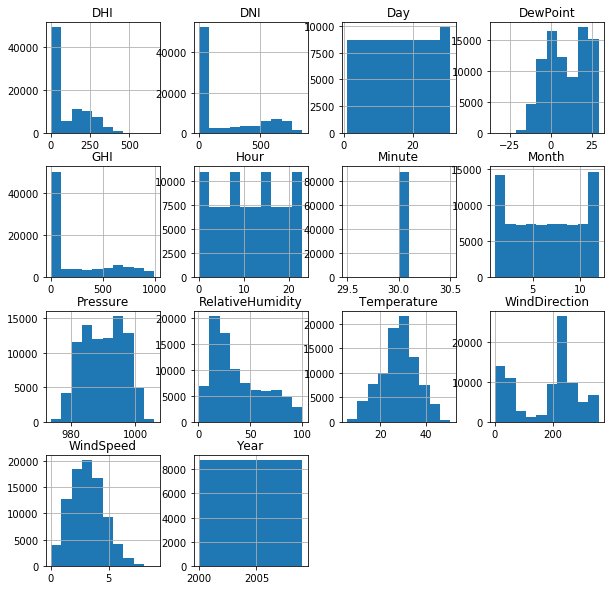

In [11]:
df1.hist(figsize=(10,10))
plt.show()

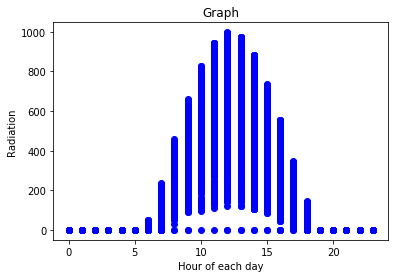

In [12]:
plt.scatter(df1.Hour,df1.GHI,color='blue')
plt.xlabel("Hour of each day")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

In [13]:
i=0
k=0
while k<=87599:
    if(df1.iloc[i].Hour<6 or df1.iloc[i].Hour>18):
        df1=df1.drop(df1.index[i])
        i=i-1
    i=i+1
    k=k+1

In [14]:
df1.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindDirection,WindSpeed
6,2000,1,1,6,30,0,0,0,-7,11.482912,995.728577,25.202363,49.919121,3.481939
7,2000,1,1,7,30,0,0,0,-6,12.043572,996.485596,27.145503,51.650745,3.553532
8,2000,1,1,8,30,75,348,141,-4,14.925156,997.046448,25.142146,55.660366,3.210883
9,2000,1,1,9,30,121,614,347,-3,18.349069,997.736328,23.041257,57.932251,2.544075
10,2000,1,1,10,30,134,726,507,-1,22.649213,997.539062,19.631354,61.001606,2.097124


In [15]:
df1=df1.drop(['Year'],axis=1)

In [16]:
df1=df1.drop(['WindDirection'],axis=1)

In [17]:
df1=df1.drop(['Month'],axis=1)

In [18]:
df1=df1.drop(['Day'],axis=1)

In [19]:
df1=df1.drop(['Minute'],axis=1)

In [20]:
df1=df1.drop(['DHI'],axis=1)

In [21]:
df1=df1.drop(['DNI'],axis=1)

In [22]:
df2=df1

In [23]:
df1=df1.div(df1.sum(axis=1), axis=0)

In [24]:
df1.head()

,Hour,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
6,0.005798,0.000000,-0.006764,0.011096,0.962153,0.024353,0.003365
7,0.006729,0.000000,-0.005768,0.011578,0.957949,0.026096,0.003416
8,0.006749,0.118955,-0.003375,0.012592,0.841159,0.021211,0.002709
9,0.006453,0.248804,-0.002151,0.013157,0.715392,0.016521,0.001824
10,0.006419,0.325435,-0.000642,0.014538,0.640303,0.012601,0.001346


In [25]:
df2=df2.astype('int')

In [26]:
df2.head()

,Hour,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
6,6,0,-7,11,995,25,3
7,7,0,-6,12,996,27,3
8,8,141,-4,14,997,25,3
9,9,347,-3,18,997,23,2
10,10,507,-1,22,997,19,2


In [27]:
from sklearn.model_selection import train_test_split

X=df1[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed',
     'Hour','DewPoint']]


Y=df1.GHI

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

X1=df2[['Temperature', 'Pressure', 'RelativeHumidity', 'WindSpeed',
     'Hour','DewPoint']]


Y1=df2.GHI

X1_train, X1_test, Y1_train, Y1_test= train_test_split(X1, Y1, random_state= 0)

def model_score_error(model):
    prepared_model=model.fit(X1_train, Y1_train)
    x=prepared_model.score(X1_test,Y1_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X1_test)
    return Target_predicted

In [28]:
X_train.shape

(35587, 6)

In [29]:
X_test.shape

(11863, 6)

In [30]:
from sklearn.neural_network import MLPRegressor

In [31]:
df1.shape

(47450, 7)

In [32]:
df1.head()

,Hour,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
6,0.005798,0.000000,-0.006764,0.011096,0.962153,0.024353,0.003365
7,0.006729,0.000000,-0.005768,0.011578,0.957949,0.026096,0.003416
8,0.006749,0.118955,-0.003375,0.012592,0.841159,0.021211,0.002709
9,0.006453,0.248804,-0.002151,0.013157,0.715392,0.016521,0.001824
10,0.006419,0.325435,-0.000642,0.014538,0.640303,0.012601,0.001346


In [33]:
df2.head()

,Hour,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
6,6,0,-7,11,995,25,3
7,7,0,-6,12,996,27,3
8,8,141,-4,14,997,25,3
9,9,347,-3,18,997,23,2
10,10,507,-1,22,997,19,2


In [34]:
df1.head()

,Hour,GHI,DewPoint,Temperature,Pressure,RelativeHumidity,WindSpeed
6,0.005798,0.000000,-0.006764,0.011096,0.962153,0.024353,0.003365
7,0.006729,0.000000,-0.005768,0.011578,0.957949,0.026096,0.003416
8,0.006749,0.118955,-0.003375,0.012592,0.841159,0.021211,0.002709
9,0.006453,0.248804,-0.002151,0.013157,0.715392,0.016521,0.001824
10,0.006419,0.325435,-0.000642,0.014538,0.640303,0.012601,0.001346


In [35]:
MLP = MLPRegressor(activation='relu', alpha=10, batch_size=150, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

outpu=model_score_error(MLP)

Score:  0.9247055588774302


In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)

In [38]:
prepared_model=GBoost.fit(X_train, Y_train)
x=prepared_model.score(X_test,Y_test)
print('Score: ',x)
Target=prepared_model.predict(X_test)

Score:  0.9996628885380003


In [39]:
rms = sqrt(mean_squared_error(Y_test, Target))

In [40]:
rms

0.002874529806201355

In [41]:
#MAPE ISSUE AS ACTUAL VAUE IS 0 SO ANSWER BECOMES NOT DEFINED